<a href="https://colab.research.google.com/github/RasikhTariq/hello-world/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd


# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()


,Institution,Registration date,Birth date,Gender,Country of residence,Discipline,Education level,Occupation
0,ITESM,2024-02-07,1984-05-29 00:00:00,prefiero no contestar,-,-,-,-
1,Tec de Monterrey,2024-02-21,1980-08-30 00:00:00,Masculino,México,-,Maestría,Profesional
2,UCA,2024-02-25,1989-09-21 00:00:00,Femenina,Marruecos,-,Doctorado,Profesional
3,Universidad Autónoma del Estado de Morelos,2024-03-05,1987-01-21 00:00:00,Masculino,México,-,Doctorado,Profesional
4,UCR,2024-03-07,1947-03-28 00:00:00,Indefinido,Afganistán,-,Preparatoria,Profesional


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Registration date' column to datetime format if it's not already
df['Registration date'] = pd.to_datetime(df['Registration date'])

# Find the smallest (earliest) registration date
earliest_date = df['Registration date'].min()

# Find the largest (latest) registration date
latest_date = df['Registration date'].max()

# Display the results
print(f"Earliest registration date: {earliest_date}")
print(f"Latest registration date: {latest_date}")


Earliest registration date: 2024-02-07 00:00:00
Latest registration date: 2024-05-14 00:00:00


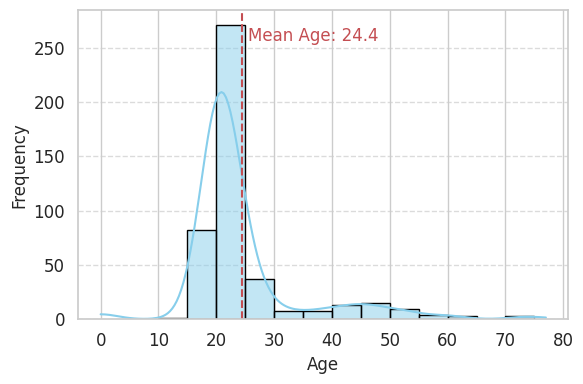

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Convert the 'Birth date' column to datetime format, invalid parsing will be set as NaT
df['Birth date'] = pd.to_datetime(df['Birth date'], errors='coerce')

# Drop rows with NaT in 'Birth date'
df = df.dropna(subset=['Birth date'])

# Extract the year of birth
df['Birth Year'] = df['Birth date'].dt.year

# Calculate the current year
current_year = datetime.datetime.now().year

# Calculate the age of each participant
df['Age'] = current_year - df['Birth Year']

# Set the style and color palette of the plot
sns.set(style="whitegrid")

# Plot the histogram of ages
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=range(10, 80, 5), kde=True, color='skyblue', edgecolor='black')

# Add titles and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add an annotation for the mean age
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='r', linestyle='--', linewidth=1.5)
plt.text(mean_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Mean Age: {mean_age:.1f}', color='r', fontsize=12)
plt.tight_layout()

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/age_histogram.jpeg', dpi=600)

# Display the plot
plt.show()


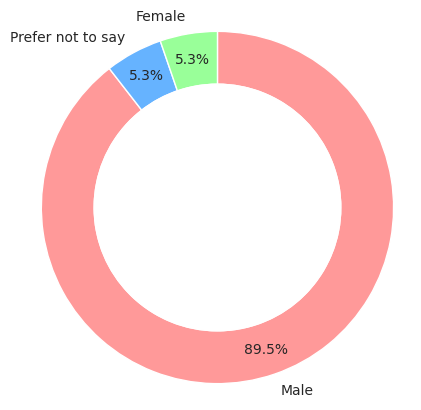

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Translate the Gender column
translation_dict = {
    'prefiero no contestar': 'Prefer not to say',
    'Masculino': 'Male',
    'Femenina': 'Female'
}

df['Gender'] = df['Gender'].map(translation_dict)

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plot a donut chart
plt.figure(figsize=(5, 5))
colors = ['#ff9999','#66b3ff','#99ff99']

# Function to display the percentages
def autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

plt.pie(gender_counts, labels=gender_counts.index, colors=colors, startangle=90,
        counterclock=False, wedgeprops=dict(width=0.3), autopct=autopct,
        pctdistance=0.85, textprops={'fontsize': 10})

# Add a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title with professional formatting

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/gender_donut_chart.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


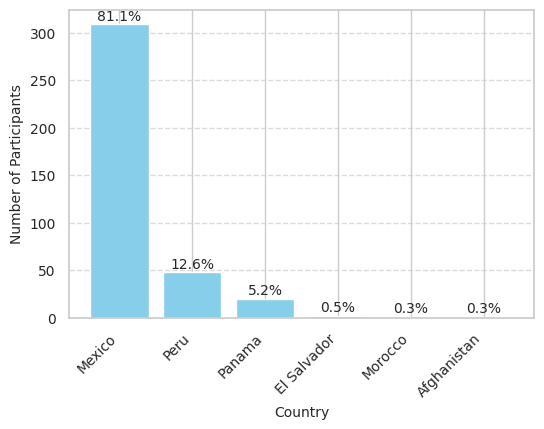

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Translate the Country of residence column
country_translation_dict = {
    'México': 'Mexico',
    'Marruecos': 'Morocco',
    'Afganistán': 'Afghanistan',
    'El Salvador': 'El Salvador',
    'Perú': 'Peru',
    'Panamá': 'Panama',
    # Add more translations as needed
}

df['Country of residence'] = df['Country of residence'].map(country_translation_dict)

# Drop rows with NaN in 'Country of residence' after translation
df = df.dropna(subset=['Country of residence'])

# Count the occurrences of each country
country_counts = df['Country of residence'].value_counts()

# Calculate the percentages
total_counts = country_counts.sum()
percentages = country_counts / total_counts * 100

# Plot a bar chart for Country of residence
plt.figure(figsize=(6, 4))
bars = plt.bar(country_counts.index, country_counts.values, color='#87CEEB')

# Add titles and labels
plt.xlabel('Country', fontsize=10)
plt.ylabel('Number of Participants', fontsize=10)

# Customize the ticks
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on the bars
for bar, pct in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/country_bar_chart.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


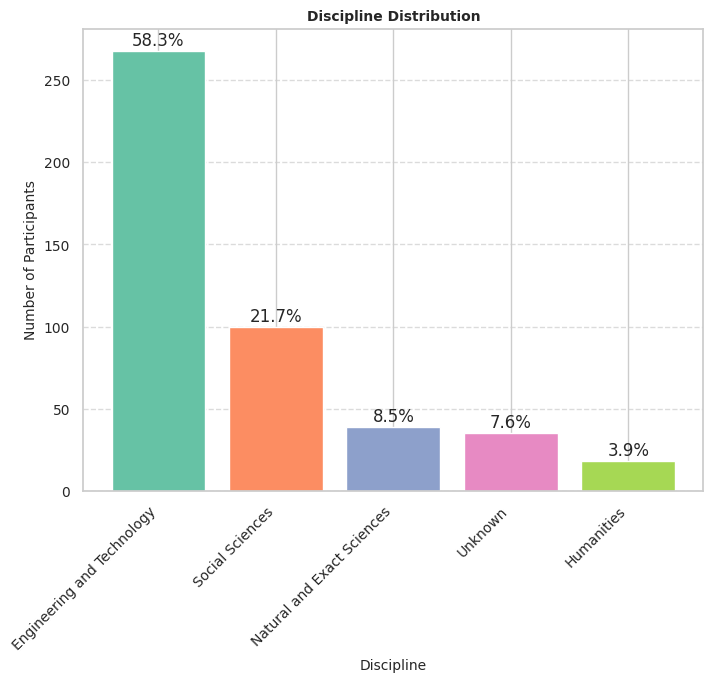

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Translate the Discipline column
discipline_translation_dict = {
    '-': 'Unknown',
    'Ingeniería y tecnología': 'Engineering and Technology',
    'Ciencias sociales': 'Social Sciences',
    'Ciencias exactas y naturales': 'Natural and Exact Sciences',
    'Ciencias Humanidades': 'Humanities'
}

df['Discipline'] = df['Discipline'].map(discipline_translation_dict)

# Drop rows with NaN in 'Discipline' after translation
df = df.dropna(subset=['Discipline'])

# Count the occurrences of each discipline
discipline_counts = df['Discipline'].value_counts()

# Calculate the percentages
total_counts = discipline_counts.sum()
percentages = discipline_counts / total_counts * 100

# Plot a bar chart for Discipline
plt.figure(figsize=(8, 6))
bars = plt.bar(discipline_counts.index, discipline_counts.values, color=sns.color_palette("Set2"))

# Add titles and labels
plt.title('Discipline Distribution', fontsize=10, fontweight='bold')
plt.xlabel('Discipline', fontsize=10)
plt.ylabel('Number of Participants', fontsize=10)

# Customize the ticks
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on the bars
for bar, pct in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=12)

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/discipline_bar_chart.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# List of university names
university_list = [
    "Universidad Politécnica de la Region Laguna",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores chalco",
    "Tencológico de Monterrey",
    "Tecnológico de estudios superiores de Chalco",
    "Tecnológico de Estudios Superiores Chalco",
    "Universidad Nacional de San Agustin",
    "sdf",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad Politécnica de la Región Laguna",
    "Universidad Politécnica de la Región Laguna",
    "Tencológico de Monterrey",
    "Universidad Nacional de San Agustín",
    "Benemérita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad Nacional de San Agustín de Arequipa",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico de estudios superiores de Chalco",
    "Tecnológico de chalco",
    "Instituto Tecnico Superior Especializado",
    "Instituto Politécnico de la región laguna",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad Politécnica de la Región Laguna.",
    "Tecnologico de Estudios Superiores de Chalco",
    "UNIVERSIDAD POLITECNICA DE LA REGION LAGUNA",
    "universidad nacional de san agustin",
    "Universidad de San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Tecnológico Superior de Lerdo",
    "Tecnológico de estudios superiores de Chalco",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Tecnológico de Monterrey",
    "ITSE",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores de Chalco",
    "Tecnológico de Estudios Superiores de Chalco",
    "universidad de San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "TESCHA",
    "Tecnológico de Estudios Superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad nacional de San Agustín de Arequipa",
    "Tecnológico de estudios superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Tencológico de Monterrey",
    "Tecnológico de estudios superiores de Chalco",
    "Tencológico de chalco",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad Politécnica de la Región Laguna",
    "Universidad de San Carlos de Guatemala",
    "Instituto Politécnico de la Región Laguna",
    "Universidad Nacional de San Agustín",
    "Tencológico de Monterrey",
    "USAC",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de Monterrey",
    "Facultad de Ingeniería USAC",
    "USAC",
    "Universidad de San Carlos de Guatemala",
    "Usac",
    "Tecnológico de estudios superiores de Chalco",
    "instituto tecnologico superior de lerdo",
    "Instituto Técnico Superior Especializado",
    "Benemerita escuela normal de coahuila",
    "Tencológico de Monterrey",
    "Tecnológico de Estudios Superiores de Chalco",
    "Itse",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores de Chalco",
    "UNIVERSIDAD POLITECNICA DE LA REGION LAGUNA",
    "Tecnológico de Estudios superiores de Chalco",
    "Itse",
    "Universidad Nacional de San Agustin de Arequipa",
    "instituto tecnológico superior de lerdo",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "Universidad San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "Universidad San Carlos de Guatemala",
    "ITSE",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de Estudios Superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Instituto Tecnológico de Monterrey",
    "instituto tecnológico superior de lerdo",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Instituto Técnico Superior Especializado - ITSE",
    "Universidad Politécnica de la Region Laguna",
    "universidad politecnica de la region laguna",
    "Instituto Tecnologico Superior de Lerdo",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores de chalco",
    "USAC",
    "Tecnologico de Chalco",
    "Instituto tecnologico superior de lerdo",
    "Universidad Nacional de San Agustin",
    "TESCHA",
    "Universidad de San Carlos de Guatemala",
    "Tecsup",
    "Tencológico de Monterrey",
    "Tecnológico de Estudios Superiores de Chalco",
    "Tencológico de Monterrey",
    "USAC",
    "Benemérita Escuela Normal De Coahuila",
    "Tecnológico de Estudios Superiores de grado Chalco",
    "Tecnológico de Lerdo",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "TECNOLÓGICO DE ESTUDIOS SUPERIORES DE CHALCO",
    "Tencológico de Monterrey",
    "Tecnológico de estudio superior chalco",
    "ITSE",
    "Instituto Politécnico Nacional",
    "Benemérita Escuela Normal de Coahuila",
    "TESCHA",
    "Universidad de San carlos",
    "Benemérita Escuela normal De Coahuila",
    "Instituto Tecnológico Superior de Lerdo",
    "Universidad Nacional de San Agustín de Arequipa",
    "Universidad Nacional de San Agustín",
    "Tencológico de Monterrey",
    "ITSE",
    "Tencológico de Monterrey",
    "Tecnológico de estudios superiores de Chalco",
    "INSTITUTO TÉCNICO SUPERIOR ESPECIALIZADO",
    "instituto tecnológico superior de lerdo",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de estudios superiores de",
    "Tencológico de Monterrey",
    "Universidad Nacional de San Augustin",
    "Tencológico de Monterrey",
    "TESCHA",
    "instituto tecnológico superior de lerdo",
    "Tencológico de Monterrey",
    "Universidad Politécnica de la Región Laguna",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Universidad Nacional de San Agustín",
    "UNIVERSIDAD DE SAN CARLOS DE GUATEMALA",
    "Bnemérita Escuela Normal de Coahuila",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de Estudios Superiores de Chalco",
    "Universidad San Carlos de Guatemala",
    "Itse",
    "Univerdidad nacional de San Agustín",
    "UNSA",
    "Universidad Nacional de San Agustín",
    "Universidad Politécnica de la Región Laguna",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San Carlos",
    "Instituto Tecnológico Superior de Lerdo",
    "Instituto Politécnico de la Región Laguna",
    "UNIVERSIDAD POLITECNICA DE LA REGION LAGUNA",
    "Benc",
    "Universidad Nacional de San Agustín",
    "USAC",
    "Instituto Tecnologico Superior de Lerdo",
    "Instituto Politécnico Nacional",
    "Tecnológico de estudios superiores de chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico de Estudios Superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila.",
    "Itse",
    "Universidad Politécnica de la Región Laguna",
    "Tecnologico de Estudios Superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "Tecnológico de Estudios Superiores Chalco",
    "Itse",
    "Universidad Nacional de San Agustín",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "Instituto Tecnológico Superior de Lerdo",
    "Benemérita escuela normal de Coahuila",
    "Universidad Nacional de San Agustin",
    "Tecnológico de estudios superiores de Chalco",
    "universidad nacional de san agustin",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico de lerdo",
    "TECNOLOGICO DE ESTUDIOS SUPERIORES DE CHALCO",
    "ITSL",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Tecnológico de Estudios Superiores de Chalco",
    "Universidad Politécnica de la Región Laguna",
    "Universidad de San Carlos de Guatemala",
    "Universidad De San Carlos",
    "Tencológico de Monterrey",
    "Tecnológico de Estudios Superiores de Chalco",
    "Universidad San Carlos de Guatemala",
    "Universidad Nacional de San Agustin",
    "Instituto Tecnológico Superior de Lerdo",
    "Universidad San Carlos de Guatemala",
    "Instituto Politécnico Nacional",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "UNSA",
    "Universidad Nacional de San Agustín",
    "San Carlos de Guatemala",
    "Universidad de san Carlos",
    "Universidad Politécnica de la Región Laguna",
    "Universidad Politécnica de la Region Laguna",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San Carlos de Guatemala",
    "Universidad San Carlos de Guatemala",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San Carlos",
    "Universidad de San Carlos de Guatemala",
    "Tecnologico de Estudios Superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "Instituto Superior Técnico Especializado",
    "Universidad de San Carlos de Guatemala",
    "Tecnologico de Estudios Superiores de Chalco",
    "TECNOLÓGICO DE ESTUDIOS SUPERIORES DE CHALCO",
    "Tencológico de estudios superiores Chalco",
    "Tecnológico de estudios superiores de Chalco",
    "universidad politecnica de la region laguna",
    "universidad politecnica de la region laguna",
    "ITSE",
    "Benemérita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "Benemerita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "UNSA",
    "UNSA",
    "Universidad politecnica de la region laguna",
    "Benemerita Escuela Normal de Coahuila",
    "Tecnológico de Estudios Superiores de Chalco",
    "TECNOLOGICO DE ESTUDIOS SUPERIORES DE CHALCO",
    "Itse",
    "Benemérita Escuela Normal Coahuila",
    "Universidad de San Carlos de Guatemala",
    "Universidad de San carlos de Guatemala",
    "USAC",
    "Tencológico de Monterrey",
    "Benemérita Escuela Normal de Coahuila",
    "Unsa",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Universidad Nacional da San Agustín de Arequipa",
    "Tecnológico de Estudios Superiores de Chalco",
    "Tencológico de Monterrey",
    "Benemérita Escuela Normal De Coahuila",
    "Universidad Nacional de San Agustín",
    "Universidad polítecnica de la región laguna",
    "Universidad de San Carlos de Guatemala",
    "universidad politécnica de la región laguna",
    "Universidad San Carlos de Guatemala",
    "Universidad de San Carlos de Guatemala",
    "ITSE",
    "Instituto Tecnológico Superior de Lerdo",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Usac",
    "Universidad Nacional de San Agustín de Arequipa",
    "Universidad Nacional de San Agustín de Arequipa",
    "TESCHA",
    "Tencológico de Monterrey",
    "Tencológico de estudios superiores chalco",
    "Benemérita Escuela Normal De Coahuila",
    "Universidad de san carlos de  Guatemala",
    "Universidad San Carlos de Guatemala",
    "Tecnológico de Estudios Superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico estudios superiores de Chalco",
    "Tencológico de Monterrey",
    "Unsa",
    "Universidad de San Carlos de Guatemala",
    "UNIVERSIDAD NACIONAL DE SAN AGUSTÍN",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad Nacional de San Agustín de Arequipa",
    "Tencológico de Estudios Superiores de Chalco",
    "Universidad Politécnica de la Región Laguna",
    "Universidad Politécnica de la region laguna",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico de Monterrey",
    "universidad politecnica region laguna",
    "BENEMERITA ESCUELA NORMAL DE COAHUILA",
    "universidad Nacional de San Agustin",
    "Benemérita Escuela Normal de Coahuila",
    "Tencológico de Monterrey",
    "Instituto tecnológico superior de lerdo",
    "Benemerita Escuela Normal de Coahuila",
    "Universidad Nacional de San Agustin",
    "Benemérita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "tecnologico superior de lerdo",
    "TECNOLOGICO DE CHALCO",
    "Tecnológico de Estudios Superiores de Chalco",
    "Universidad Politécnica de la Región Laguna",
    "Tencológico de Monterrey",
    "Benemerita Escuela Normal de Coahuila",
    "Universidad de San Carlos de Guatemala",
    "Universidad Nacional de San Agustín",
    "Universidad Nacional de San Agustin",
    "Universidad San Carlos de Guatemala",
    "Universidad Nacional de San Agustín de Arequipa",
    "Tecnológico de Estudios Superiores de Chalco",
    "Tecnologico de Estudios Superiores Chalco",
    "Universidad San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Tecnologico de Estudios Superiores de Chalco",
    "UCM",
    "Instituto Politécnico Nacional",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Benemérita Escuela Normal de Coahuila",
    "Tencológico de Monterrey",
    "Universidad nacional san Agustín",
    "Tecnologíco Superior de Lerdo",
    "Universidad Nacional San Agustin de Arequipa",
    "Benemérita Escuela Normal de Coahuila",
    "instituto tecnológico superior de lerdo",
    "ITSE",
    "tencologico de lerdo",
    "Universidad de San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "Universidad San Carlos de Guatemala",
    "Tencológico de Monterrey",
    "tecnologico superiores de chalco",
    "Universidad Nacional de San Agustin de Arequipa",
    "Universidad de San Carlos de Guatemala",
    "Universidad San Carlos de Guatemala",
    "USAC",
    "Tecnológico de estudios superiores de Chalco",
    "Universidad Nacional de San Agustin",
    "Universidad de San Carlos de Guatemala",
    "tecnologico de estudios superiores de chalco",
    "Tecnológico de Estudios Superiores de Chalco",
    "Universidad de San Carlos de Guatemala",
    "benemerita escuela normal de coahuila",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "Universidad San Carlos de Guatemala",
    "ITSE",
    "Tencológico de Monterrey",
    "Tencológico de Monterrey",
    "ITESM",
    "Tencológico de Monterrey",
    "TECNOLÓGICO DE ESTUDIOS SUPERIORES DE CHALCO",
    "Tecnológico de Estudios Superiores Chalco",
    "Universidad Politécnica de la Región Laguna",
    "instituto tecnológico superior de lerdo",
    "Tencológico de Monterrey",
    "ITESM",
    "Universidad Nacional de San Agustín",
    "Instituto Tecnológico Superior de Lerdo",
    "Phono&Medical SA CV",
    "UNIVERSIDAD POLITECNICA DE LA REGION LAGUNA",
    "Benemérita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "BENEMÉRITA ESCUELA NORMAL DE COAHUILA",
    "Benemerita Escuela Normal de Coahuila",
    "Benemérita Escuela Normal de Coahuila",
    "Universidad de San Carlos de Guatemala",
    "Universidad Politécnica de la Región Laguna",
    "Tencológico de Monterrey",
    "Tecnológico de Estudios superiores de Chalco",
    "TECNOLOGICO DE ESTUDIOS SUPERIORES CHALCO",
    "Tecnológico de Estudios Superiores de Chalco",
    "Tencológico de Monterrey",
    "Universidad Nacional de San Agustín de Arequipa",
    "Tecnológico de estudios superiores de Chalco",
    "Benemérita Escuela Normal De Coahuila",
    "Benemerita escuela normal de coahuila",
    "Benemérita Escuela Normal de Coauila",
    "Tencológico de Monterrey",
    "Benemérita Escuela Normal De Coahuila",
    "Tecnológico de Estudios Superiores Chalco",
    "Tecnologico de Estudios Superiores de Chalco",
    "Tecnologico de Estudios Superiores de Chalco",
    "Tencológico de Monterrey",
    "Universidad de San Carlos de Guatemala",
    "Universidad Nacional de San Agustín de Arequipa",
    "Universidad Politécnica de la Región Laguna",
    "Instituto Politécnico Nacional",
    "Tecnológico Chalco",
    "Instituto Politécnico Nacional",
    "Instituto Politécnico Nacional",
    "Tecnológico de Estudios Superiores de Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "UNSA",
    "Instituto Técnico Superior Especializado",
    "Benemérita Escuela Normal de Coahuila",
    "Tecnológico de Estudios Superiores Chalco",
    "Benemérita Escuela Normal de Coahuila",
    "Instituto Politécnico Nacional",
    "Tencológico de Monterrey",
]

# DataFrame creation to use pandas capabilities
df = pd.DataFrame(university_list, columns=['University'])

# Remove leading and trailing whitespace and make all text lowercase for normalization
df['University'] = df['University'].str.strip().str.lower()

# Dictionary to standardize names
standardization_dict = {
    'universidad politecnica de la region laguna': 'Universidad Politécnica de la Región Laguna',
    'universidad de san carlos de guatemala': 'Universidad de San Carlos de Guatemala',
    'tecnológico de estudios superiores de chalco': 'Tecnológico de Estudios Superiores de Chalco',
    'tecnológico de estudios superiores chalco': 'Tecnológico de Estudios Superiores de Chalco',
    'tecnológico de estudios superiores de grado chalco': 'Tecnológico de Estudios Superiores de Chalco',
    'tencológico de monterrey': 'Tecnológico de Monterrey',
    'tecnológico de monterrey': 'Tecnológico de Monterrey',
    'instituto tecnico superior especializado': 'Instituto Técnico Superior Especializado',
    'instituto técnico superior especializado': 'Instituto Técnico Superior Especializado',
    'itse': 'Instituto Técnico Superior Especializado',
    'univerdidad nacional de san agustín': 'Universidad Nacional de San Agustín',
    'universidad nacional de san agustín': 'Universidad Nacional de San Agustín',
    'universidad nacional de san agustin': 'Universidad Nacional de San Agustín',
    'universidad nacional de san agustín de arequipa': 'Universidad Nacional de San Agustín de Arequipa',
    'universidad nacional san agustin de arequipa': 'Universidad Nacional de San Agustín de Arequipa',
    'benemérita escuela normal de coahuila': 'Benemérita Escuela Normal de Coahuila',
    'benemérita escuela normal coahuila': 'Benemérita Escuela Normal de Coahuila',
    'benemerita escuela normal de coahuila': 'Benemérita Escuela Normal de Coahuila',
    'benemérita escuela normal de coauila': 'Benemérita Escuela Normal de Coahuila',
    'benemérita escuela normal de coahuila.': 'Benemérita Escuela Normal de Coahuila',
    'benemérita escuela normal de coahuila': 'Benemérita Escuela Normal de Coahuila',
    'tescha': 'Tecnológico de Estudios Superiores de Chalco',
    'itsem': 'Tecnológico de Estudios Superiores de Monterrey',
    'instituto tecnológico de monterrey': 'Tecnológico de Estudios Superiores de Monterrey',
    'instituto politécnico nacional': 'Instituto Politécnico Nacional',
    'instituto superior técnico especializado': 'Instituto Técnico Superior Especializado',
    'instituto tecnológico superior de lerdo': 'Instituto Tecnológico Superior de Lerdo',
    'instituto tecnologico superior de lerdo': 'Instituto Tecnológico Superior de Lerdo',
    'tecnologico superior de lerdo': 'Instituto Tecnológico Superior de Lerdo',
    'tecnologico de lerdo': 'Instituto Tecnológico Superior de Lerdo',
    'tecnologíco superior de lerdo': 'Instituto Tecnológico Superior de Lerdo',
    'tecnologico de estudios superiores de chalco': 'Tecnológico de Estudios Superiores de Chalco',
    'instituto politécnico de la región laguna': 'Instituto Politécnico de la Región Laguna',
    'facultad de ingeniería usac': 'Universidad de San Carlos de Guatemala',
    'usac': 'Universidad de San Carlos de Guatemala',
    'universidad de san carlos': 'Universidad de San Carlos de Guatemala',
    'universidad san carlos de guatemala': 'Universidad de San Carlos de Guatemala',
    'san carlos de guatemala': 'Universidad de San Carlos de Guatemala',
    'instituto politécnico nacional': 'Instituto Politécnico Nacional',
    'universidad nacional san agustín': 'Universidad Nacional de San Agustín',
    'universidad de san carlos de guatemala.': 'Universidad de San Carlos de Guatemala'
}

# Apply the standardization
df['University'] = df['University'].map(standardization_dict).fillna(df['University'])

# Get unique university names
unique_universities = df['University'].unique()

# Print unique universities
for university in unique_universities:
    print(university)


universidad politécnica de la region laguna
Universidad de San Carlos de Guatemala
Tecnológico de Estudios Superiores de Chalco
Tecnológico de Monterrey
Universidad Nacional de San Agustín
sdf
Benemérita Escuela Normal de Coahuila
universidad politécnica de la región laguna
Universidad Nacional de San Agustín de Arequipa
tecnológico de chalco
Instituto Técnico Superior Especializado
Instituto Politécnico de la Región Laguna
universidad politécnica de la región laguna.
Universidad Politécnica de la Región Laguna
tecnológico superior de lerdo
tencológico de chalco
Instituto Tecnológico Superior de Lerdo
universidad nacional de san agustin de arequipa
Tecnológico de Estudios Superiores de Monterrey
instituto técnico superior especializado - itse
tecnologico de chalco
tecsup
tecnológico de lerdo
tecnológico de estudio superior chalco
Instituto Politécnico Nacional
tecnológico de estudios superiores de
universidad nacional de san augustin
bnemérita escuela normal de coahuila
unsa
benc
itsl


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseForum.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)
df







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?","Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?",What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?
0,Lograr reducir el uso de energias de combustib...,Implementar un diseño nuevo de panel que pueda...,Los desafíos son la implementación de paneles ...
1,Es importante aprovechar las energías renovabl...,se puede optimizar el diseño y desarrollar tec...,No hay datos
2,"Es muy importante, debido a que la fuente al t...",Se tendría que identificar cuáles son esas zon...,Deben utilizarse materia prima de alta calidad...
3,Considero de suma importancia no solo para el ...,No hay datos,No hay datos
4,"Juega un papel muy importante, pues además de ...",Se podría checar de qué manera aumentar la poc...,"Al ser de un costo elevado, no muchos podrían ..."
...,...,...,...
300,Considero que la energía fotovoltica es esenci...,Creo que dar seguimientos a las investigacione...,Considero que es la falta de recursos en ciert...
301,Considero que la energía solar fotovoltaica de...,Opino que estas tecnología fotovoltaicas puede...,Opino que un desafío muy acuciante es la forma...
302,Yo pienso que la energía fotovoltaica es algo ...,Pienso que primero se debe hacer un estudio de...,La generación solar es intermitente y variable...
303,yo opino que la energía fotovoltaica es una en...,yo creo que la irradiación es un problema que ...,No hay datos


In [ ]:
# Assuming the DataFrame has columns: 'Question 1', 'Question 2', 'Question 3'
# Create separate DataFrames for each question
df_question_1 = df[['What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?']]
df_question_2 = df[['Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?']]
df_question_3 = df[['What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?']]

# Display the first few rows of each DataFrame to verify the split

In [ ]:
print("Question 1 DataFrame:")
df_question_1.head()

Question 1 DataFrame:


,"What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?"
0,Lograr reducir el uso de energias de combustib...
1,Es importante aprovechar las energías renovabl...
2,"Es muy importante, debido a que la fuente al t..."
3,Considero de suma importancia no solo para el ...
4,"Juega un papel muy importante, pues además de ..."


In [ ]:
print("\nQuestion 2 DataFrame:")
df_question_2.head()


Question 2 DataFrame:


,"Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?"
0,Implementar un diseño nuevo de panel que pueda...
1,se puede optimizar el diseño y desarrollar tec...
2,Se tendría que identificar cuáles son esas zon...
3,No hay datos
4,Se podría checar de qué manera aumentar la poc...


In [ ]:

print("\nQuestion 3 DataFrame:")
df_question_3.head()


Question 3 DataFrame:


,What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?
0,Los desafíos son la implementación de paneles ...
1,No hay datos
2,Deben utilizarse materia prima de alta calidad...
3,No hay datos
4,"Al ser de un costo elevado, no muchos podrían ..."


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseForum.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)



# Assuming the DataFrame has columns: 'Question 1', 'Question 2', 'Question 3'
# Create separate DataFrames for each question
df_question_1 = df[['What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?']]
df_question_2 = df[['Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?']]
df_question_3 = df[['What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?']]


# Remove rows with "No hay datos"
df_question_1 = df_question_1[df_question_1['What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?'] != "No hay datos"]
df_question_2 = df_question_2[df_question_2['Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?'] != "No hay datos"]
df_question_3 = df_question_3[df_question_3['What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?'] != "No hay datos"]

# Display the first few rows of each DataFrame to verify the removal
print("Question 1 DataFrame after removing 'No hay datos':")
print(df_question_1.head())

print("\nQuestion 2 DataFrame after removing 'No hay datos':")
print(df_question_2.head())

print("\nQuestion 3 DataFrame after removing 'No hay datos':")
print(df_question_3.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Question 1 DataFrame after removing 'No hay datos':
  What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?
0  Lograr reducir el uso de energias de combustib...                                                                                                                                                                         
1  Es importante aprovechar las energías renovabl...                                                                                                                                                                         
2  Es muy importante, debido a que la fuente al t...                                                                                                     

In [ ]:
df_question_1 = df_question_1[df_question_1['What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?'].str.strip().astype(bool)]

df_question_1

,"What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?"
0,Lograr reducir el uso de energias de combustib...
1,Es importante aprovechar las energías renovabl...
2,"Es muy importante, debido a que la fuente al t..."
3,Considero de suma importancia no solo para el ...
4,"Juega un papel muy importante, pues además de ..."
...,...
300,Considero que la energía fotovoltica es esenci...
301,Considero que la energía solar fotovoltaica de...
302,Yo pienso que la energía fotovoltaica es algo ...
303,yo opino que la energía fotovoltaica es una en...


In [ ]:
df_question_2 = df_question_2[df_question_2['Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?'].str.strip().astype(bool)]

df_question_2


,"Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?"
0,Implementar un diseño nuevo de panel que pueda...
1,se puede optimizar el diseño y desarrollar tec...
2,Se tendría que identificar cuáles son esas zon...
4,Se podría checar de qué manera aumentar la poc...
5,Es de gran ayuda par innovar en las energías r...
...,...
300,Creo que dar seguimientos a las investigacione...
301,Opino que estas tecnología fotovoltaicas puede...
302,Pienso que primero se debe hacer un estudio de...
303,yo creo que la irradiación es un problema que ...


In [ ]:
df_question_3 = df_question_3[df_question_3['What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?'].str.strip().astype(bool)]


df_question_3

,What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?
0,Los desafíos son la implementación de paneles ...
2,Deben utilizarse materia prima de alta calidad...
4,"Al ser de un costo elevado, no muchos podrían ..."
5,la transición de energía implica buscar energí...
6,La integración de sistemas fotovoltaicos solar...
...,...
299,mejorar la calidad del ambiente en cuanto a en...
300,Considero que es la falta de recursos en ciert...
301,Opino que un desafío muy acuciante es la forma...
302,La generación solar es intermitente y variable...


In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=381e9d85613da045885365ae5ab8b0d659c6cc6151d4a03ea50c749f721e4011
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
import pandas as pd
from google.colab import drive
from googletrans import Translator


# Translate the responses
translator = Translator()
df_question_1['Question 1'] = df_question_1['What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?'].apply(lambda x: translator.translate(x, src='es', dest='en').text)


In [ ]:
df_question_1

,"What is the role of solar photovoltaic energy in the energy transition towards non-carbon sources and how does it contribute to the achievement of the Sustainable Development Goals (SDGs), specifically SDG 7 and SDG 13?",Question 1
0,Lograr reducir el uso de energias de combustib...,"Reduce the use of fossil fuel energies, since ..."
1,Es importante aprovechar las energías renovabl...,It is important to take advantage of the renew...
2,"Es muy importante, debido a que la fuente al t...","It is very important, because the source is be..."
3,Considero de suma importancia no solo para el ...,I consider the utmost importance not only for ...
4,"Juega un papel muy importante, pues además de ...","Play a very important role, because it is easy..."
...,...,...
300,Considero que la energía fotovoltica es esenci...,I consider that photovoltaic energy is essenti...
301,Considero que la energía solar fotovoltaica de...,I consider that photovoltaic solar energy play...
302,Yo pienso que la energía fotovoltaica es algo ...,I think that photovoltaic energy is a fundamen...
303,yo opino que la energía fotovoltaica es una en...,I think that photovoltaic energy is an easy ac...


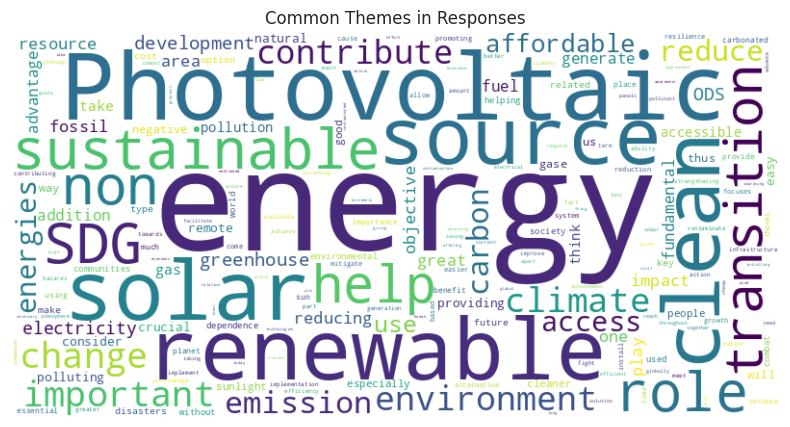

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_question_1 has a column 'Question 1' with the responses
responses = df_question_1['Question 1'].tolist()

# Combine all responses into a single string for word cloud generation
all_responses = " ".join(responses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_responses)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Responses')
plt.show()


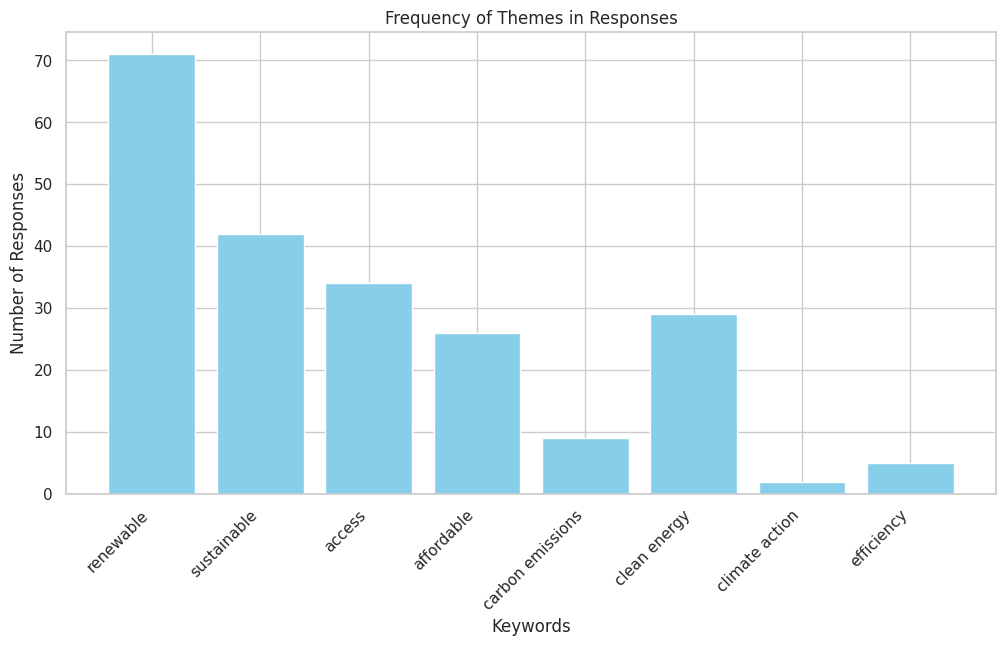

In [ ]:
# Define keywords related to the themes
keywords = ['affordable', 'clean energy', 'carbon emissions', 'climate action', 'renewable', 'sustainable', 'access', 'efficiency']

# Count occurrences of each keyword in the responses
keyword_counts = Counter()
for response in responses:
    for keyword in keywords:
        if keyword in response.lower():
            keyword_counts[keyword] += 1

# Convert keyword counts to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

# Plot a bar chart of keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Number of Responses')
plt.title('Frequency of Themes in Responses')
plt.xticks(rotation=45, ha='right')
plt.show()


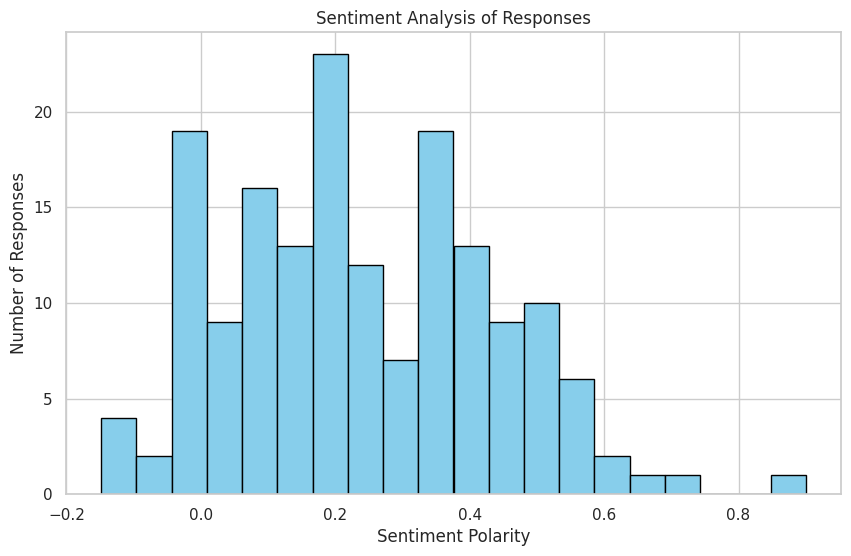

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each response
df_question_1['Sentiment'] = df_question_1['Question 1'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df_question_1['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Responses')
plt.title('Sentiment Analysis of Responses')
plt.show()


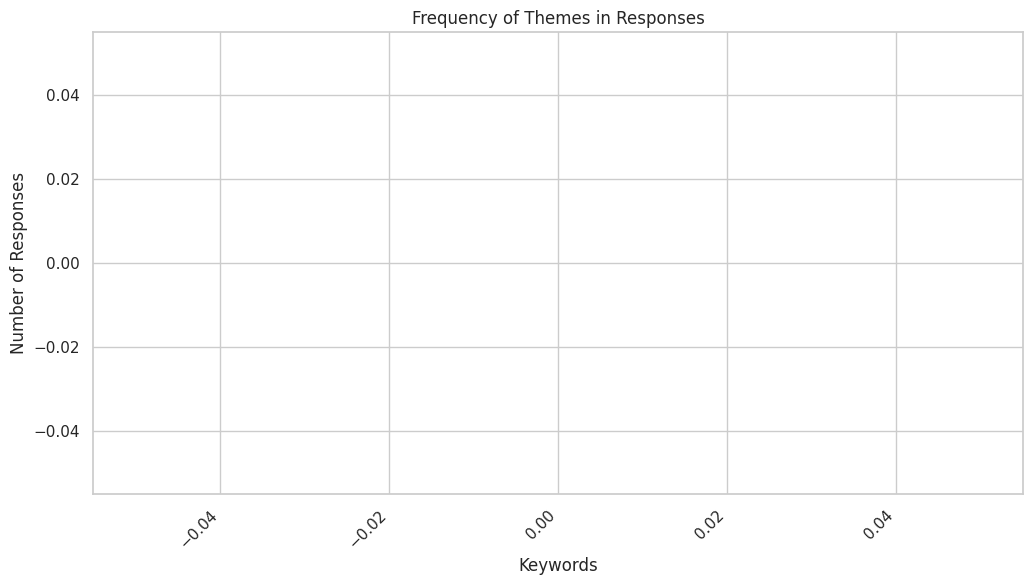

In [ ]:
# Define keywords related to the themes
keywords = ['affordable', 'clean energy', 'carbon emissions', 'climate action', 'renewable', 'sustainable', 'access', 'efficiency']

# Count occurrences of each keyword in the responses
keyword_counts = Counter()
for response in responses:
    for keyword in keywords:
        if keyword in response.lower():
            keyword_counts[keyword] += 1

# Convert keyword counts to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

# Plot a bar chart of keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Number of Responses')
plt.title('Frequency of Themes in Responses')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd
from google.colab import drive
from googletrans import Translator


# Translate the responses
translator = Translator()
df_question_2['Question 2'] = df_question_2['Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?'].apply(lambda x: translator.translate(x, src='es', dest='en').text)



df_question_2


,"Given the variability of solar irradiance in different parts of the world, how can PV technologies be adapted or improved to maximize energy efficiency in regions with low solar irradiance?",Question 2
0,Implementar un diseño nuevo de panel que pueda...,Implement a new panel design that can be obtai...
1,se puede optimizar el diseño y desarrollar tec...,Design can be optimized and develop hybrid tec...
2,Se tendría que identificar cuáles son esas zon...,It would have to identify which are those area...
4,Se podría checar de qué manera aumentar la poc...,It could be checked how to increase the little...
5,Es de gran ayuda par innovar en las energías r...,It is very helpful to innovate in renewable en...
...,...,...
300,Creo que dar seguimientos a las investigacione...,I think that investigations follow up to new s...
301,Opino que estas tecnología fotovoltaicas puede...,I think that these photovoltaic technology can...
302,Pienso que primero se debe hacer un estudio de...,I think that a study of the region should firs...
303,yo creo que la irradiación es un problema que ...,I believe that irradiation is a problem that m...


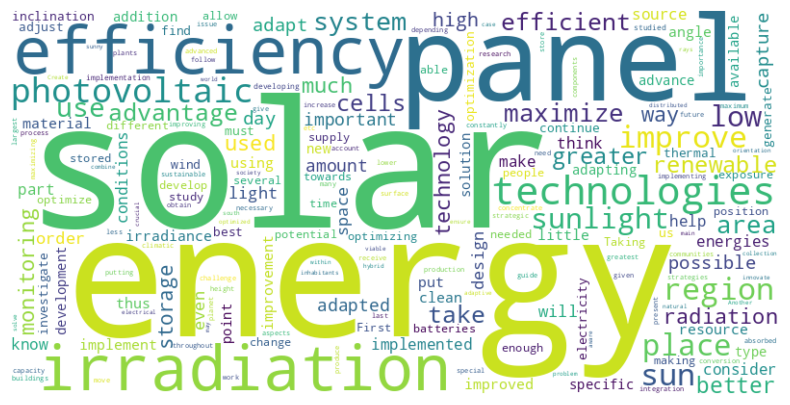

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_question_1 has a column 'Question 1' with the responses
responses = df_question_2['Question 2'].tolist()

# Combine all responses into a single string for word cloud generation
all_responses = " ".join(responses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_responses)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


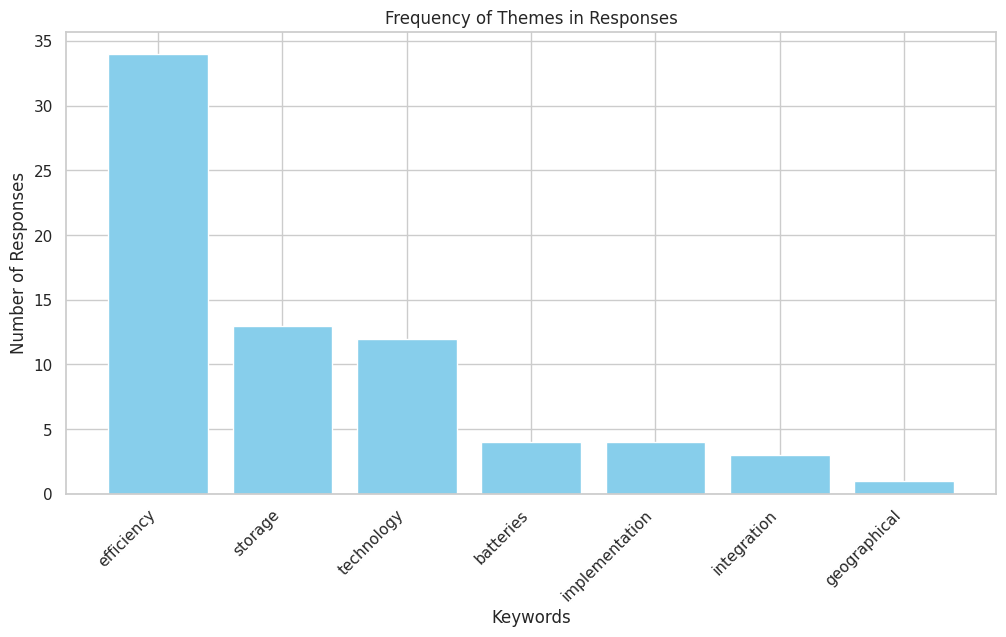

In [ ]:
# Define keywords related to the themes
keywords = ['efficiency', 'storage', 'technology', 'adaption', 'integration', 'implementation', 'batteries', 'geographical']

# Count occurrences of each keyword in the responses
keyword_counts = Counter()
for response in responses:
    for keyword in keywords:
        if keyword in response.lower():
            keyword_counts[keyword] += 1

# Convert keyword counts to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

# Plot a bar chart of keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Number of Responses')
plt.title('Frequency of Themes in Responses')
plt.xticks(rotation=45, ha='right')
plt.show()


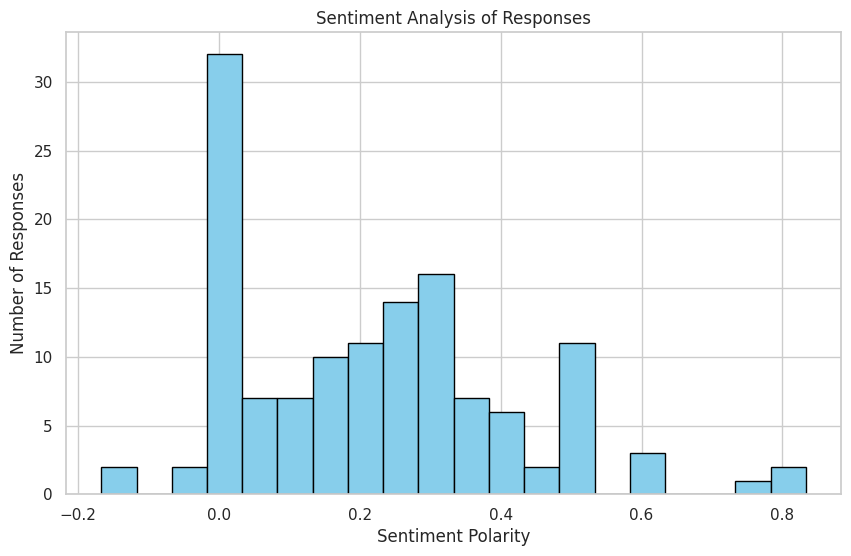

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each response
df_question_2['Sentiment'] = df_question_2['Question 2'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df_question_2['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Responses')
plt.title('Sentiment Analysis of Responses')
plt.show()


In [ ]:
import pandas as pd
from google.colab import drive
from googletrans import Translator


# Translate the responses
translator = Translator()
df_question_3['Question 3'] = df_question_3['What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?'].apply(lambda x: translator.translate(x, src='es', dest='en').text)


df_question_3


,What are the challenges and opportunities of integrating large-scale solar PV systems into existing power grids and how can they be addressed to ensure a sustainable energy transition?,Question 3
0,Los desafíos son la implementación de paneles ...,The challenges are the implementation of solar...
2,Deben utilizarse materia prima de alta calidad...,"High quality raw material should be used, camp..."
4,"Al ser de un costo elevado, no muchos podrían ...","Being a high cost, not many could have access ..."
5,la transición de energía implica buscar energí...,The energy transition implies seeking less pol...
6,La integración de sistemas fotovoltaicos solar...,The integration of large -scale solar photovol...
...,...,...
299,mejorar la calidad del ambiente en cuanto a en...,Improve the quality of the environment in term...
300,Considero que es la falta de recursos en ciert...,I consider that it is the lack of resources in...
301,Opino que un desafío muy acuciante es la forma...,I think that a very pressing challenge is the ...
302,La generación solar es intermitente y variable...,The solar generation is intermittent and varia...


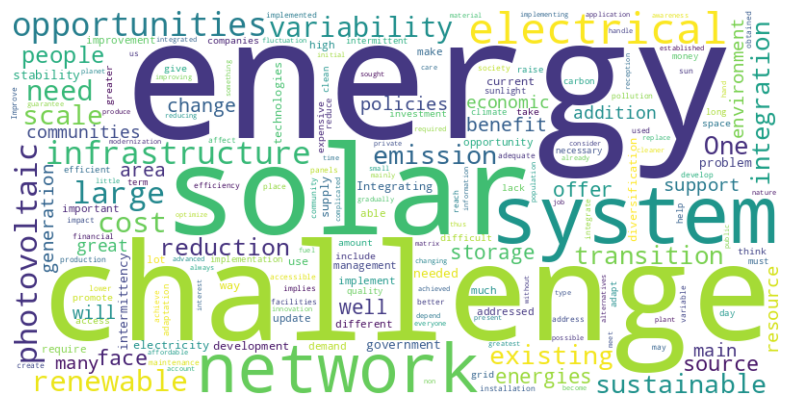

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df_question_1 has a column 'Question 1' with the responses
responses = df_question_3['Question 3'].tolist()

# Combine all responses into a single string for word cloud generation
all_responses = " ".join(responses)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_responses)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


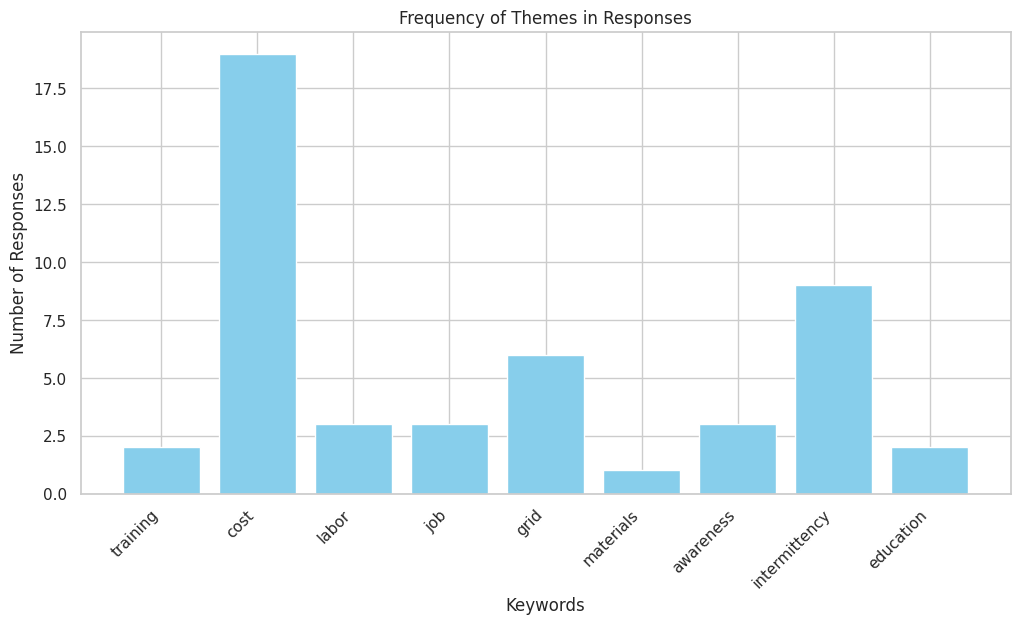

In [ ]:
# Define keywords related to the themes
keywords = ['education', 'cost', 'materials', 'labor', 'intermittency', 'grid', 'awareness', 'training', 'job', 'equity', 'decentralized']

# Count occurrences of each keyword in the responses
keyword_counts = Counter()
for response in responses:
    for keyword in keywords:
        if keyword in response.lower():
            keyword_counts[keyword] += 1

# Convert keyword counts to a DataFrame
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])

# Plot a bar chart of keyword frequencies
plt.figure(figsize=(12, 6))
plt.bar(keyword_df['Keyword'], keyword_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Number of Responses')
plt.title('Frequency of Themes in Responses')
plt.xticks(rotation=45, ha='right')
plt.show()


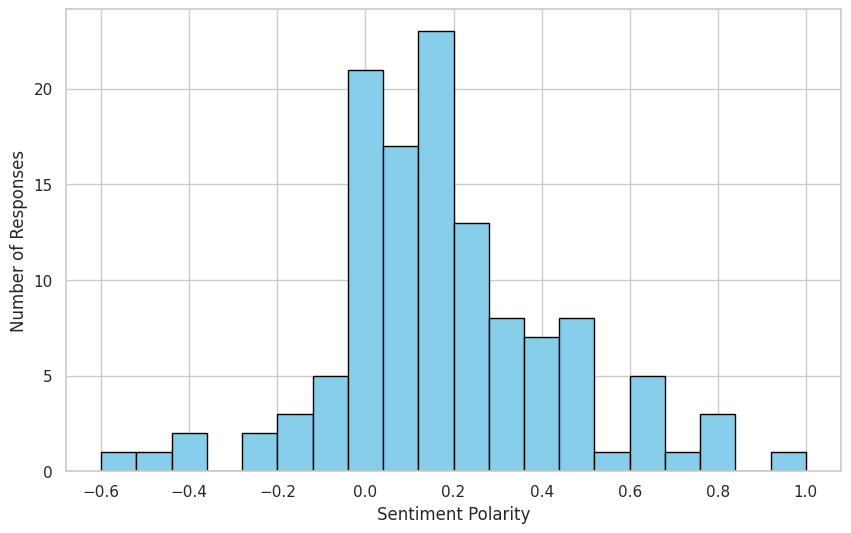

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each response
df_question_3['Sentiment'] = df_question_3['Question 3'].apply(get_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(df_question_3['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Responses')
plt.show()


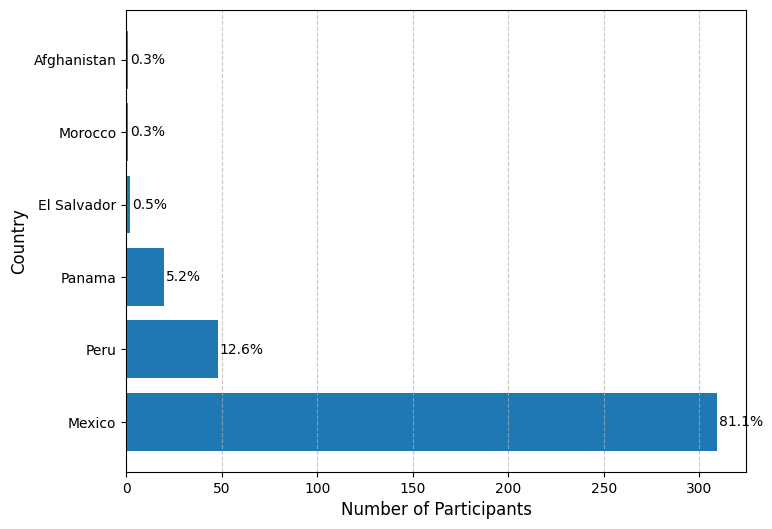

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Translate the Country of residence column
country_translation_dict = {
    'México': 'Mexico',
    'Marruecos': 'Morocco',
    'Afganistán': 'Afghanistan',
    'El Salvador': 'El Salvador',
    'Perú': 'Peru',
    'Panamá': 'Panama',
    # Add more translations as needed
}

df['Country of residence'] = df['Country of residence'].map(country_translation_dict)

# Drop rows with NaN in 'Country of residence' after translation
df = df.dropna(subset=['Country of residence'])

# Count the occurrences of each country
country_counts = df['Country of residence'].value_counts()

# Calculate the percentages
total_counts = country_counts.sum()
percentages = country_counts / total_counts * 100

# Plot a horizontal bar chart for Country of residence
plt.figure(figsize=(8, 6))
bars = plt.barh(country_counts.index, country_counts.values, color='#1f77b4')

# Add titles and labels
plt.ylabel('Country', fontsize=12)
plt.xlabel('Number of Participants', fontsize=12)

# Customize the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels on the bars
for bar, pct in zip(bars, percentages):
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, f'{pct:.1f}%', va='center', fontsize=10)

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/country_horizontal_bar_chart.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


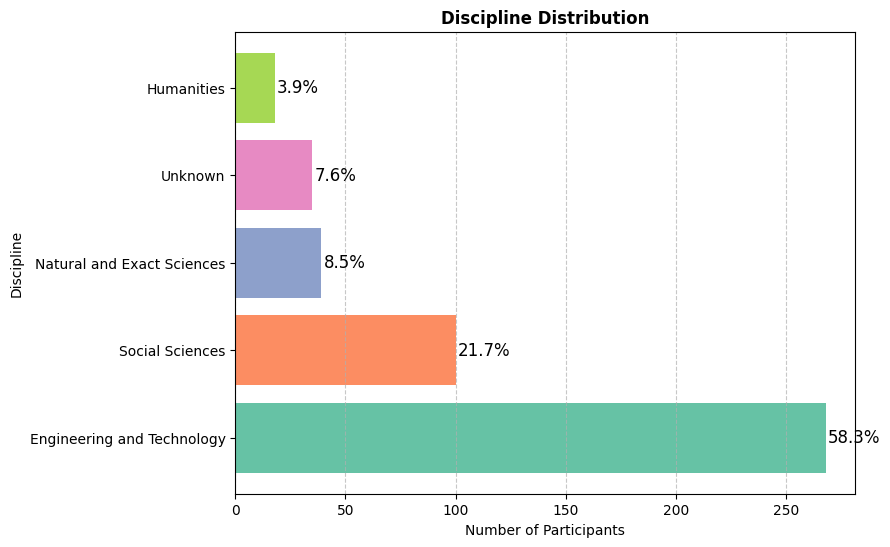

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Digital Forum/DatabaseECCT.xlsx'
df = pd.read_excel(file_path)

# Translate the Discipline column
discipline_translation_dict = {
    '-': 'Unknown',
    'Ingeniería y tecnología': 'Engineering and Technology',
    'Ciencias sociales': 'Social Sciences',
    'Ciencias exactas y naturales': 'Natural and Exact Sciences',
    'Ciencias Humanidades': 'Humanities'
}

df['Discipline'] = df['Discipline'].map(discipline_translation_dict)

# Drop rows with NaN in 'Discipline' after translation
df = df.dropna(subset=['Discipline'])

# Count the occurrences of each discipline
discipline_counts = df['Discipline'].value_counts()

# Calculate the percentages
total_counts = discipline_counts.sum()
percentages = discipline_counts / total_counts * 100

# Plot a horizontal bar chart for Discipline
plt.figure(figsize=(8, 6))
bars = plt.barh(discipline_counts.index, discipline_counts.values, color=sns.color_palette("Set2"))

# Add titles and labels
plt.title('Discipline Distribution', fontsize=12, fontweight='bold')
plt.ylabel('Discipline', fontsize=10)
plt.xlabel('Number of Participants', fontsize=10)

# Customize the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels on the bars
for bar, pct in zip(bars, percentages):
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, f'{pct:.1f}%', va='center', fontsize=12)

# Save the plot with 600 DPI
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Digital Forum/discipline_horizontal_bar_chart.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()
